# Survival *lifelines*
[https://lifelines.readthedocs.io/](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html)

In [2]:
%load_ext watermark
%watermark -v -m  -u -n -p pandas,numpy,matplotlib,lifelines -a Filippo_Valle -g -r -b -w

Filippo_Valle 
last updated: Thu Jul 30 2020 

CPython 3.7.6
IPython 7.15.0

pandas 1.0.4
numpy 1.18.5
matplotlib 3.2.1
lifelines 0.24.10

compiler   : GCC 7.5.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   : 188fa0adff84e082f0f4971683cd84cd055feb66
Git repo   : git@github.com:fvalle1/phd.git
Git branch : master
watermark 2.0.2


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir("/home/jovyan/work/phd/datasets/cancers/breast")

In [4]:
#df_files = pd.read_csv("files.txt", sep="\t").set_index("file_name").dropna(how="all", thresh=5, axis=1)

df_files = pd.read_csv("files.dat", sep=",",index_col=0).dropna(how="all", thresh=100, axis=1)
#df_files = df_files[df_files["dataset"]=="tcga"]
df_files.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 3a3d56a9-e18a-4346-9350-bed393553080.FPKM.txt.gz to 71c9e9d3-9276-468c-a3a0-053880a75511.FPKM.txt.gz
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   cases.0.submitter_id                           1222 non-null   object 
 1   cases.0.demographic.gender                     1221 non-null   object 
 2   cases.0.demographic.days_to_birth              1205 non-null   float64
 3   cases.0.demographic.days_to_death              200 non-null    float64
 4   cases.0.demographic.vital_status               1221 non-null   object 
 5   cases.0.diagnoses.0.age_at_diagnosis           1205 non-null   float64
 6   cases.0.diagnoses.0.days_to_last_follow_up     1077 non-null   float64
 7   cases.0.diagnoses.0.last_known_disease_status  1221 non-null   object 
 8   cases.0.diagnoses.0.tumor_stage           

In [5]:
df_files["cases.0.diagnoses.0.last_known_disease_status"].unique()

array(['not reported', nan], dtype=object)

In [6]:
bins = np.linspace(0,100,20)
avg = df_files["cases.0.diagnoses.0.age_at_diagnosis"].mean(skipna=True)
df_files["age_at_diagnosis"]=pd.cut(df_files["cases.0.diagnoses.0.age_at_diagnosis"].fillna(avg)/365., bins=bins, labels = (bins[1:]+bins[:-1])/2).__array__()

In [7]:
df_files["gender"] = (df_files["cases.0.demographic.gender"]=="male").astype(int)

In [8]:
for letter in ["a", "b", "c"]:
    for (old, new) in zip(["stage %s%s"%(i,letter) for i in ["i", "ii", "iii", "iv"]],["stage %s"%i for i in ["i", "ii", "iii", "iv"]]):
        df_files.replace(old, new, inplace=True)
df_files["cases.0.diagnoses.0.tumor_stage"].unique()

array(['stage i', 'stage ii', 'stage iii', 'stage x', 'stage iv',
       'not reported', nan], dtype=object)

In [9]:
df_files["tumor_stage"]=df_files["cases.0.diagnoses.0.tumor_stage"]
for i,stage in enumerate(["stage i", "stage ii", "stage iii", "stage iv", "stage v", "stage x"]):
    df_files["tumor_stage"].replace(stage, i+1, inplace=True)

In [10]:
#0 = Alive
df_files["vital_status"]=(df_files["cases.0.demographic.vital_status"]=="Dead").astype(int)

In [11]:
df_files.groupby(["vital_status","cases.0.demographic.vital_status"]).count()

,,cases.0.submitter_id,cases.0.demographic.gender,cases.0.demographic.days_to_birth,cases.0.demographic.days_to_death,cases.0.diagnoses.0.age_at_diagnosis,cases.0.diagnoses.0.days_to_last_follow_up,cases.0.diagnoses.0.last_known_disease_status,cases.0.diagnoses.0.tumor_stage,cases.0.project.project_id,id,...,death_year,age,age_binned,cancer.type,Subtype_mRNA,Subtype_Selected,Subtype_Selected_Lum,age_at_diagnosis,gender,tumor_stage
vital_status,cases.0.demographic.vital_status,,,,,,,,,,,,,,,,,,,,,
0,Alive,1020,1020,1004,0,1004,1020,1020,1020,1020,1020,...,0,0,0,1005,1005,1005,1005,1020,1020,1020
1,Dead,201,201,201,200,201,57,201,201,201,201,...,199,199,199,199,199,199,199,201,201,201


['not reported' nan]


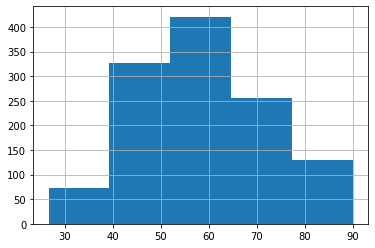

In [12]:
print(df_files["cases.0.diagnoses.0.last_known_disease_status"].unique())
(df_files["cases.0.diagnoses.0.age_at_diagnosis"]/365).hist(bins=5)
plt.show()

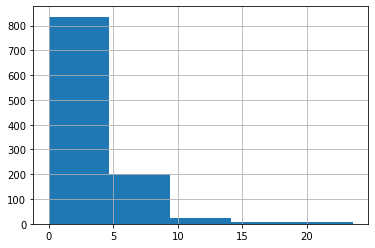

In [13]:
(df_files["cases.0.diagnoses.0.days_to_last_follow_up"]/365).hist(bins=5)
plt.show()

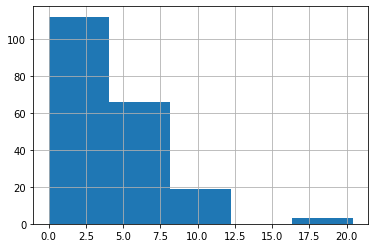

In [14]:
(df_files["cases.0.demographic.days_to_death"]/365).hist(bins=5)

In [37]:
subset[subset["cases.0.submitter_id"].isin(list(filter(lambda s: "B6-A0WT" in s, subset["cases.0.submitter_id"].values)))]

,cases.0.demographic.days_to_birth,cases.0.demographic.days_to_death,cases.0.demographic.gender,cases.0.demographic.vital_status,cases.0.diagnoses.0.age_at_diagnosis,cases.0.diagnoses.0.days_to_last_follow_up,cases.0.diagnoses.0.last_known_disease_status,cases.0.diagnoses.0.tumor_stage,cases.0.exposures.0.cigarettes_per_day,cases.0.exposures.0.years_smoked,cases.0.project.project_id,cases.0.submitter_id,id,age_at_diagnosis,gender,tumor_stage,vital_status,days_survival,smoke
file_name,,,,,,,,,,,,,,,,,,,


In [16]:
def get_survival(case):
    if case["cases.0.demographic.vital_status"] == 1:
        return case["cases.0.demographic.days_to_death"]
    else:
        return case["cases.0.diagnoses.0.days_to_last_follow_up"]

df_files["days_survival"] = df_files.apply(get_survival,1)

In [39]:
bins = np.linspace(0,100,10)
df_files["smoke"] = pd.cut(df_files["cases.0.exposures.0.years_smoked"], bins=bins, labels = (bins[1:]+bins[:-1])/2 ).__array__()
df_files["smoke"].fillna(0, inplace=True)

KeyError: 'cases.0.exposures.0.years_smoked'

In [15]:
(df_files["days_survival"]/365).hist()

KeyError: 'days_survival'

In [17]:
subset = df_files[~df_files["days_survival"].isna()].sample(80)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


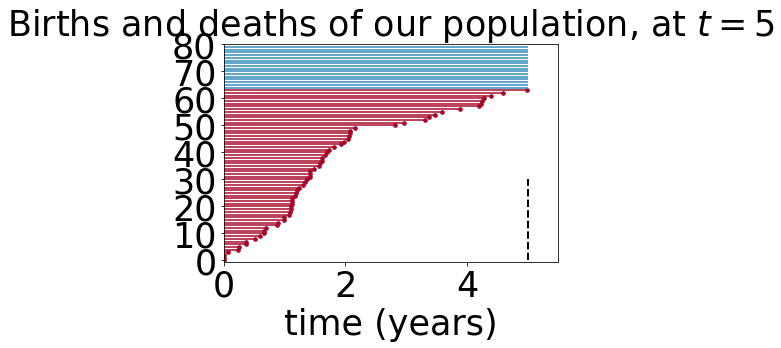

In [18]:
from lifelines.plotting import plot_lifetimes

CURRENT_TIME = 5

actual_lifetimes = subset["days_survival"].to_numpy()/365
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed, figsize=(18,15))

ax.set_xlim(0, CURRENT_TIME*1.1)
ax.vlines(CURRENT_TIME, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time (years)", fontsize=35)
ax.tick_params(labelsize=35)
ax.set_title(f"Births and deaths of our population, at $t={CURRENT_TIME}$", fontsize=35)
plt.tight_layout()
#print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

In [124]:
df_topics =pd.read_csv("topsbm/topsbm_level_2_topic-dist.csv", index_col=1).drop("i_doc",1)
df_topics = df_topics.subtract(df_topics.mean(0),1)
#df_topics[df_topics.index.isin(pd.read_csv("topsbm/topsbm_level_2_clusters.csv")["Cluster 1"].dropna())].idxmax(1)
signature = df_topics[df_topics.index.isin(pd.read_csv("topsbm/topsbm_level_2_clusters.csv")["Cluster 1"].dropna())].mean(0)
from scipy.stats import entropy, pearsonr
kl_survival = []
for sample in df_topics.index:
    #h = entropy(df_topics.loc[sample,:].values,signature)
    h = np.mean(df_topics.loc[sample,:].values-signature)
    ds = df_files.loc[sample,"days_survival"]
    if (h < np.inf) and (h!=np.nan) and (str(ds) != "nan"):
        kl_survival.append([h, ds/365])

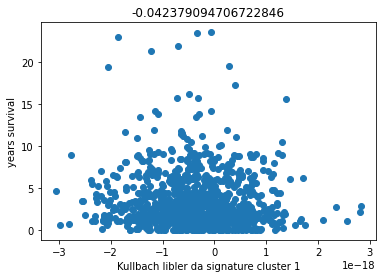

In [125]:
plt.plot(list(zip(*kl_survival))[0],list(zip(*kl_survival))[1], lw=0, marker="o")
plt.title(pearsonr(list(zip(*kl_survival))[0],list(zip(*kl_survival))[1])[0])
plt.xlabel("Kullbach libler da signature cluster 1")
plt.ylabel("years survival")
plt.show()

In [39]:
algo = "topsbm"
l = 3
pd.read_csv(f"{algo}/{algo}_level_{l}_clusters.csv").columns

Index(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
       'Cluster 6', 'Cluster 7', 'Cluster 8'],
      dtype='object')

0.07936507936507942 0.21678873239436622 0.04729194088933904


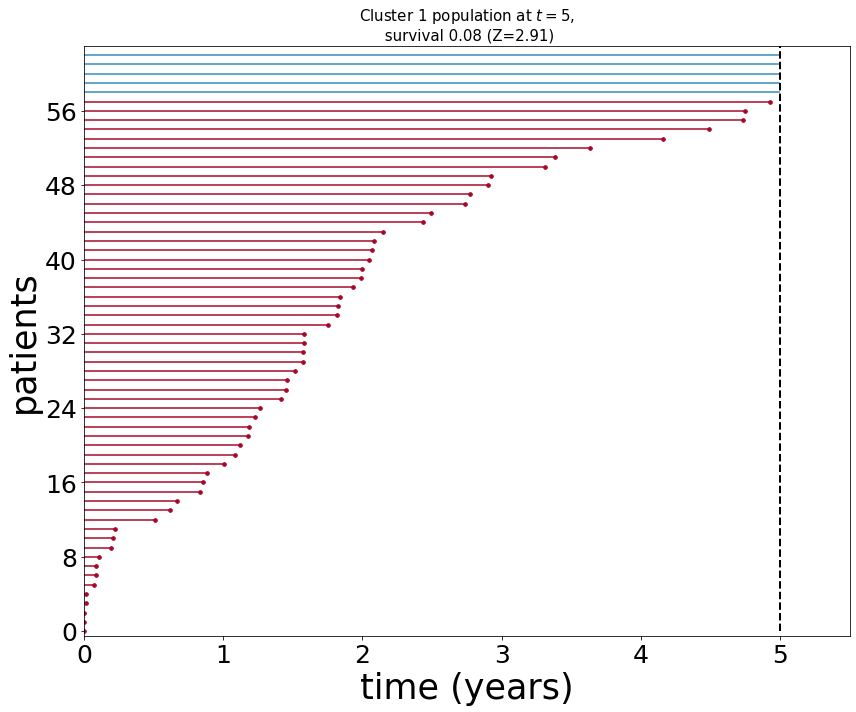

/opt/conda/lib/python3.7/site-packages/lifelines/plotting.py:624: UserWarning: For less visual clutter, you may want to subsample to less than 80 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 80 individuals.")


0.2780487804878049 0.2155039682539683 0.022363056773707087


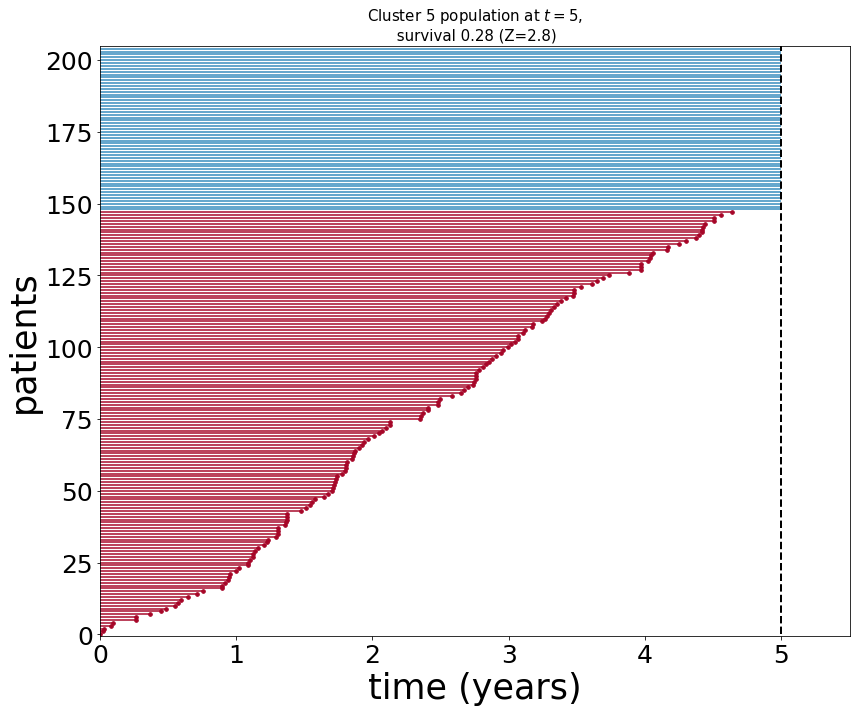

In [131]:
from lifelines.plotting import plot_lifetimes

for cluster in ["Cluster %d"%(c+1) for c in [0,4]]:
#for subtype in df_files["Subtype_Selected"].unique():
    subset = df_files[(~df_files["days_survival"].isna()) & df_files.index.isin(pd.read_csv(f"{algo}/{algo}_level_{l}_clusters.csv")[cluster].dropna())]
    #subset = df_files[(~df_files["days_survival"].isna()) & (df_files["Subtype_Selected"]==subtype)]
    
    if len(subset) > 500:
        subset = subset.sample(100)
    
    CURRENT_TIME = 5

    actual_lifetimes = subset["days_survival"].to_numpy()/365
    observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
    death_observed = actual_lifetimes < CURRENT_TIME
    survival = 1 - death_observed.sum()/len(actual_lifetimes)

    ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed, figsize=(18,15))

    survivals = []
    for stat in range(1000):
        subset = df_files[(~df_files["days_survival"].isna())].sample(len(pd.read_csv(f"{algo}/{algo}_level_{l}_clusters.csv")[cluster].dropna()))
        actual_lifetimes = subset["days_survival"].to_numpy()/365
        observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
        death_observed = actual_lifetimes < CURRENT_TIME
        survivals.append(1 - death_observed.sum()/len(actual_lifetimes))
    
    Z = np.abs(survival-np.average(survivals))/np.std(survivals)
    print(survival, np.average(survivals), np.std(survivals))
    
    ax.get_figure().set_size_inches(12,10)
    ax.set_xlim(0, CURRENT_TIME*1.1)
    ax.set_ylabel("patients", fontsize=35)
    ax.vlines(CURRENT_TIME, 0, len(subset), lw=10, linestyles='--')
    ax.set_xlabel("time (years)", fontsize=35)
    ax.tick_params(labelsize=25)
    ax.set_title(f"{cluster} population at $t={CURRENT_TIME}$,\n survival {survival.round(2)} (Z={round(Z,2)})", fontsize=15)
    plt.tight_layout()
    ax.get_figure().savefig(f"survival_{algo}_{cluster}_t{CURRENT_TIME}.pdf")
    plt.show()
#print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

In [217]:
subset = df_files[~df_files["days_survival"].isna()]
data = {}
data["duration"]=subset["days_survival"]/365
data["observed"]=subset["vital_status"]
data["entry"]=subset["cases.0.demographic.days_to_birth"]/365

In [218]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [219]:
df_files["vital_status"].sum()

201

In [220]:
T = data["duration"]
E = data["observed"]
entry = data["entry"]

(0.0, 1.0)

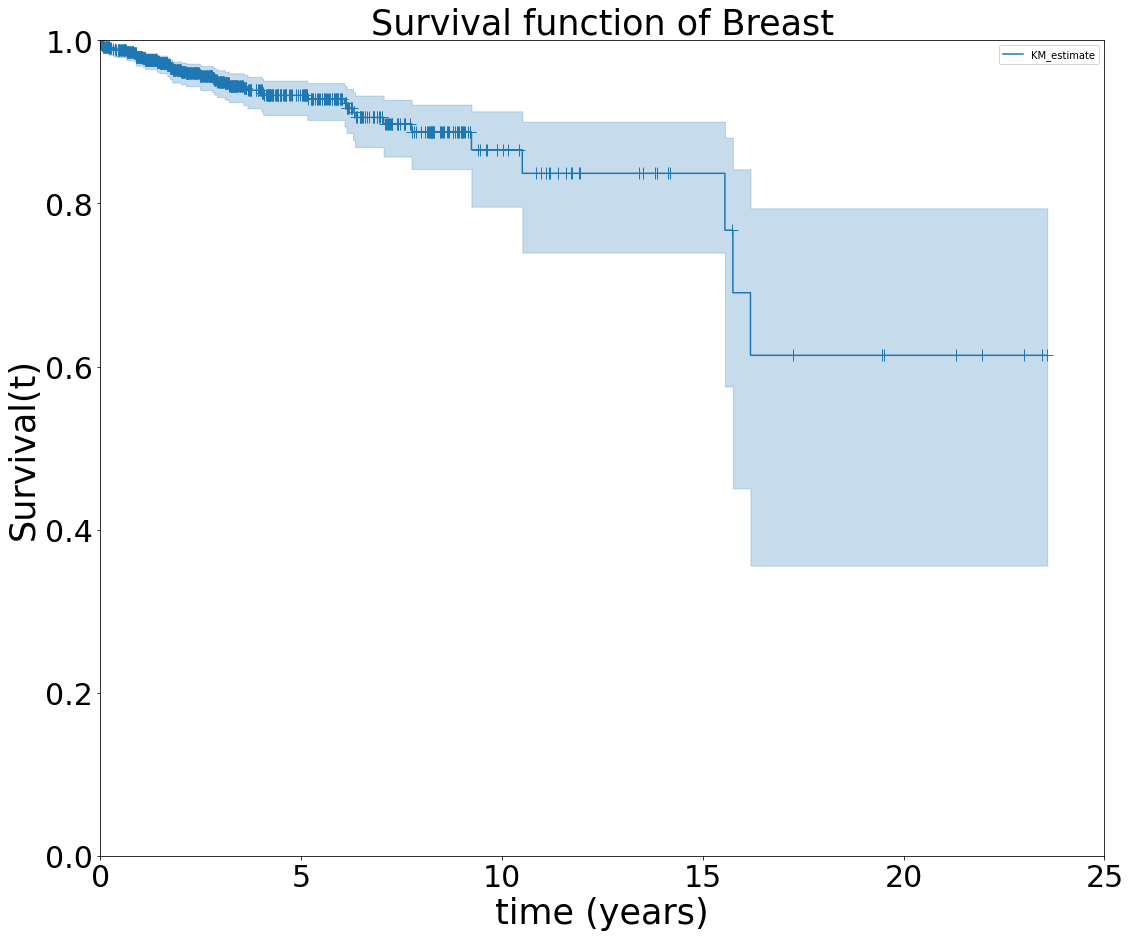

In [225]:
kmf.fit(T, event_observed=E)
ax = kmf.plot(figsize=(18,15),show_censors=True)

ax.set_title('Survival function of Breast', fontsize=35)
ax.set_xlabel("time (years)", fontsize=35)
ax.set_ylabel("Survival(t)", fontsize=35)
ax.tick_params(labelsize=30)
ax.set_xlim(0,25)
ax.set_ylim(0,1)

In [155]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
print(kmf.median_survival_time_, "+-", median_ci)

inf +-      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5               15.750685                     inf


Text(0.5, 1.0, 'Survival of different cancer types')

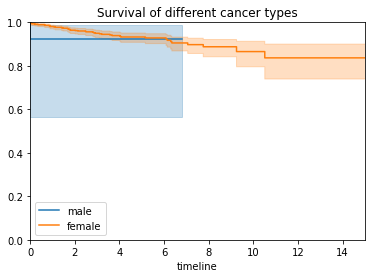

In [156]:
ax = plt.subplot(111)

mask = (subset["cases.0.demographic.gender"]=="male")

kmf.fit(T[mask], event_observed=E[mask], label="male")
kmf.plot(ax=ax)

kmf.fit(T[~mask], event_observed=E[~mask], label="female")
kmf.plot(ax=ax)

plt.ylim(0, 1)
plt.xlim(0,15)
plt.title("Survival of different cancer types")

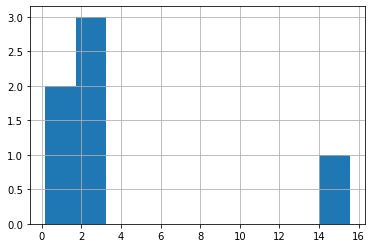

In [94]:
(df_files[(df_files["Subtype_Selected"]=="BRCA.Basal") & df_files["vital_status"]==1]["days_survival"]/365).hist()

In [283]:
for c in df_files[df_files["Subtype_Selected"]=="BRCA.LumB"]["cases.0.submitter_id"].values:
    print(c,",")

TCGA-A8-A09I ,
TCGA-D8-A1JD ,
TCGA-EW-A1OY ,
TCGA-AO-A03N ,
TCGA-A8-A09Q ,
TCGA-C8-A27A ,
TCGA-E9-A1RB ,
TCGA-B6-A0X5 ,
TCGA-EW-A2FW ,
TCGA-C8-A12U ,
TCGA-EW-A1J6 ,
TCGA-BH-A0BZ ,
TCGA-A2-A0YT ,
TCGA-BH-A0C0 ,
TCGA-A8-A09R ,
TCGA-E2-A1L7 ,
TCGA-A7-A0CJ ,
TCGA-AO-A1KT ,
TCGA-AO-A0J3 ,
TCGA-BH-A0BD ,
TCGA-D8-A1XR ,
TCGA-A7-A2KD ,
TCGA-A8-A06R ,
TCGA-C8-A274 ,
TCGA-E9-A54X ,
TCGA-D8-A13Y ,
TCGA-E2-A15A ,
TCGA-BH-A1FN ,
TCGA-C8-A26W ,
TCGA-D8-A27R ,
TCGA-AO-A1KS ,
TCGA-C8-A8HQ ,
TCGA-AN-A0FY ,
TCGA-BH-A1FJ ,
TCGA-D8-A1Y2 ,
TCGA-A1-A0SI ,
TCGA-E9-A22A ,
TCGA-E9-A249 ,
TCGA-A7-A6VX ,
TCGA-BH-A0W3 ,
TCGA-A7-A13F ,
TCGA-E2-A15S ,
TCGA-D8-A1J9 ,
TCGA-AR-A1AW ,
TCGA-AR-A24R ,
TCGA-A2-A25E ,
TCGA-EW-A1OX ,
TCGA-D8-A1XZ ,
TCGA-A2-A4S3 ,
TCGA-A2-A0T3 ,
TCGA-E2-A9RU ,
TCGA-E2-A56Z ,
TCGA-A8-A09N ,
TCGA-E2-A15K ,
TCGA-B6-A0IB ,
TCGA-A8-A095 ,
TCGA-A8-A07W ,
TCGA-C8-A1HM ,
TCGA-D8-A1XL ,
TCGA-AN-A0FF ,
TCGA-AR-A0TV ,
TCGA-AN-A0XR ,
TCGA-A2-A1G4 ,
TCGA-A2-A0D4 ,
TCGA-E9-A2JS ,
TCGA-C8-A1HL ,
TCGA-A8-A0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


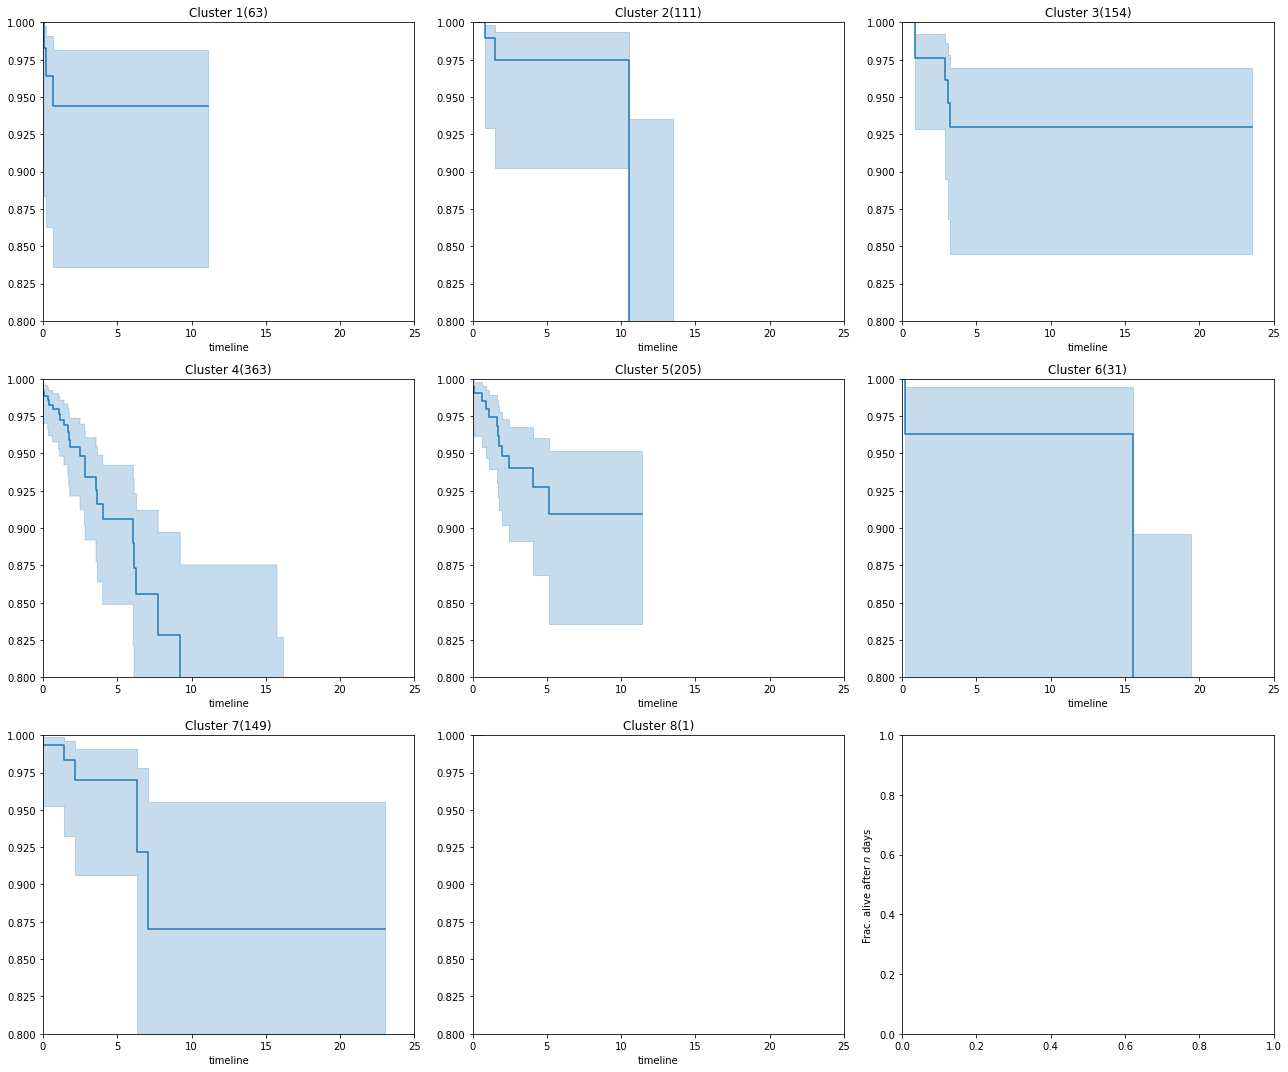

In [285]:
key = 'Subtype_Selected_num'
titles, subset[key]=np.unique(subset["Subtype_Selected"].fillna("unknown"), return_inverse=True)
labels = subset[key].unique()

fig, axs = plt.subplots(3, 3, figsize=(18,15))
titles = ["Cluster %d"%(c+1) for c in range(8)]
#for i, label in enumerate(np.sort(labels)):
for i,cluster in enumerate(["Cluster %d"%(c+1) for c in range(8)]):
 
    ax = axs.ravel()[i]
    
    #ix = subset[key] == label
    label = cluster
    ix =  subset.index.isin(pd.read_csv("topsbm/topsbm_level_3_clusters.csv")[cluster].dropna())
    
    kmf.fit(T[ix], E[ix], label=label)
    kmf.plot(ax=ax, legend=False)
    

    ax.set_title(titles[i]+f"({ix.sum()})")
    ax.set_xlim(0, 25)
    ax.set_ylim(0.8,1)
    
    if i==0:
        plt.ylabel('Frac. alive after $n$ days')

plt.tight_layout()

In [26]:
import importlib, survival
importlib.reload(survival)
from survival import fit_cox, add_group_to_subset, save_plot

In [23]:
df_clusters = pd.read_csv("topsbm/topsbm_level_1_topic-dist.csv",index_col=1).drop("i_doc",1)
#df_clusters = pd.read_csv("lda/lda_level_2_topic-dist.csv",index_col=1).drop("i_doc",1)

#df_clusters = pd.read_csv("topsbm/topsbm_level_1_topic-dist.csv",index_col=1).drop("i_doc",1)
#df_clusters = df_clusters[df_clusters.index.isin(filter(lambda doc: "GTEX" not in doc,df_clusters.index))]

In [24]:
df_files.head(2)

,cases.0.demographic.days_to_birth,cases.0.demographic.days_to_death,cases.0.demographic.gender,cases.0.demographic.vital_status,cases.0.diagnoses.0.age_at_diagnosis,cases.0.diagnoses.0.days_to_last_follow_up,cases.0.diagnoses.0.last_known_disease_status,cases.0.diagnoses.0.tumor_stage,cases.0.project.project_id,cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id,cases.0.submitter_id,id,age_at_diagnosis,gender,tumor_stage,vital_status,days_survival
file_name,,,,,,,,,,,,,,,,,
3a3d56a9-e18a-4346-9350-bed393553080.FPKM.txt.gz,-17346.0,NaN,female,Alive,17346.0,2483.0,not reported,stage i,TCGA-BRCA,TCGA-BH-A0B6-01A-11R-A19W-07,TCGA-BH-A0B6,932fe85f-b083-4669-b527-a4bd45fc4db6,50.0,0,1,0,2483.0
05eb3daf-d392-4ede-87d6-8f0aef8b6372.FPKM.txt.gz,-17715.0,1759.0,female,Dead,17715.0,NaN,not reported,stage ii,TCGA-BRCA,TCGA-BH-A208-11A-51R-A157-07,TCGA-BH-A208,858aaabe-c850-4f24-99e4-2ef56b5061e5,50.0,0,2,1,NaN


113
Too low -log2(p): -0.0
21
TCGA-LUAD :  Topic 2 
 coef   -1.173574
p       0.103677
Name: Topic_2, dtype: float64 

125
Too low -log2(p): -0.0
111
Too low -log2(p): -0.0
71
Too low -log2(p): -0.0
85
Too low -log2(p): -0.0
111
Too low -log2(p): -0.0
108
Too low -log2(p): -0.0
46
Too low -log2(p): -0.0
21
Too low -log2(p): -0.0
23
Too low -log2(p): -0.0
109
Too low -log2(p): 0.08296378704148827
34
TCGA-LUSC :  Topic 1 
 coef    0.551171
p       0.056747
Name: Topic_1, dtype: float64 

127
Too low -log2(p): -0.0
25
TCGA-LUSC :  Topic 3 
 coef    0.583845
p       0.056964
Name: Topic_3, dtype: float64 

34
TCGA-LUSC :  Topic 4 
 coef    0.623839
p       0.025089
Name: Topic_4, dtype: float64 

74
Too low -log2(p): -0.0
63
Too low -log2(p): -0.0
33
Too low -log2(p): -0.0
31
Too low -log2(p): 0.15915291746369473
107
Too low -log2(p): -0.0
125
Too low -log2(p): -0.0
128
Too low -log2(p): -0.0
45
Too low -log2(p): 0.7969165816936326


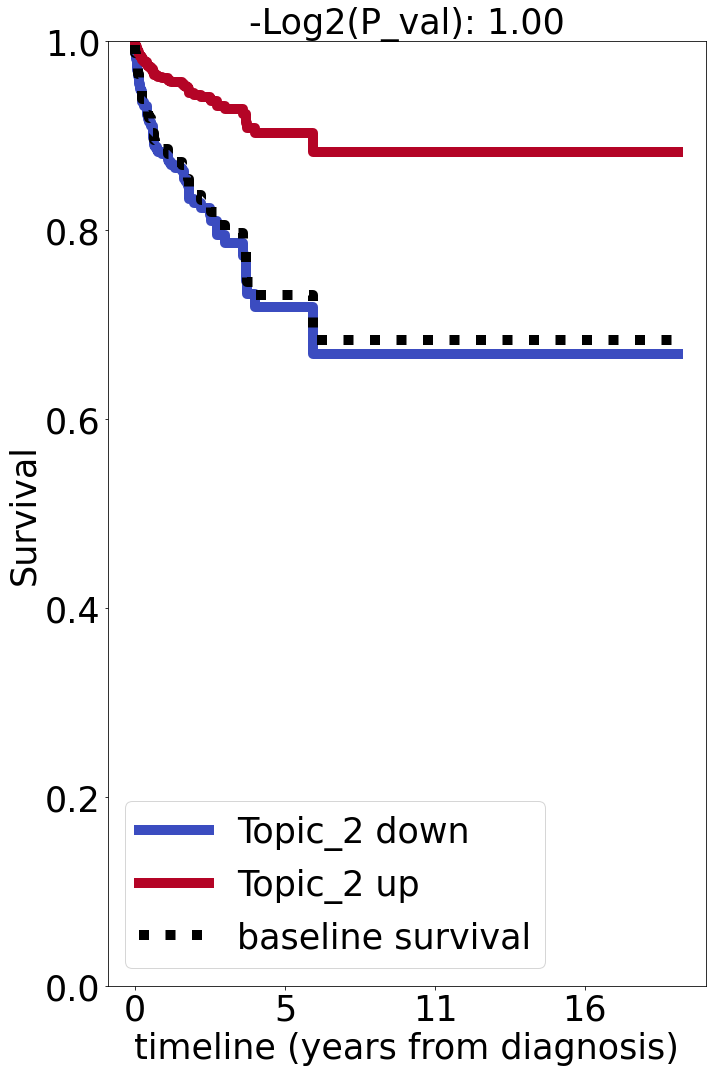

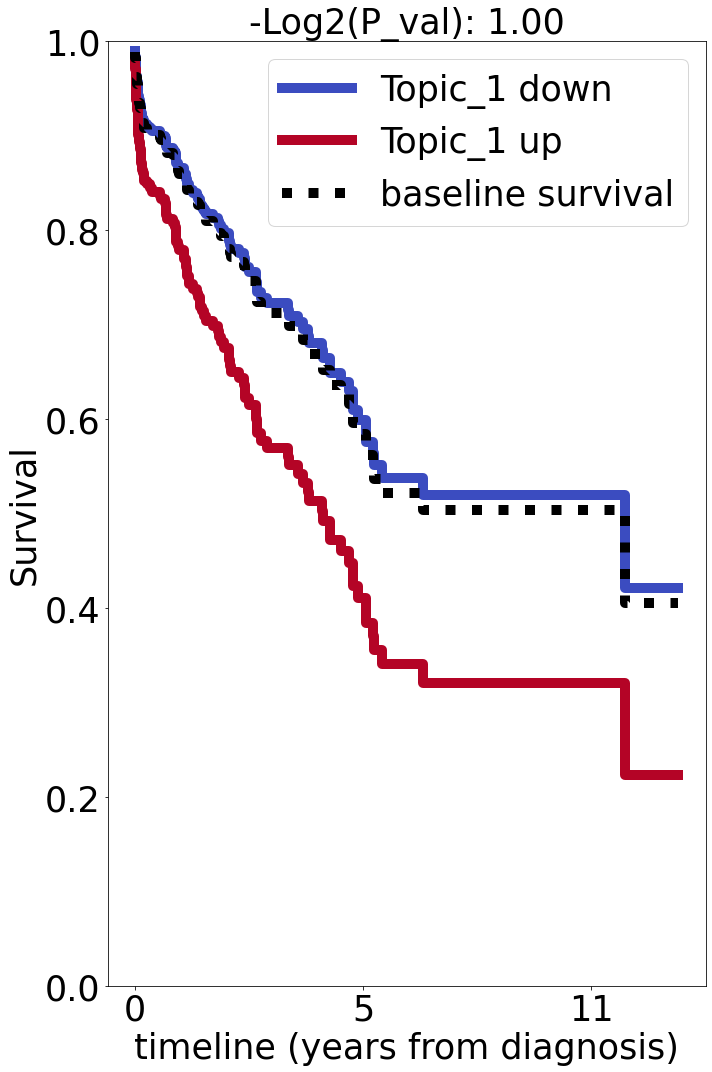

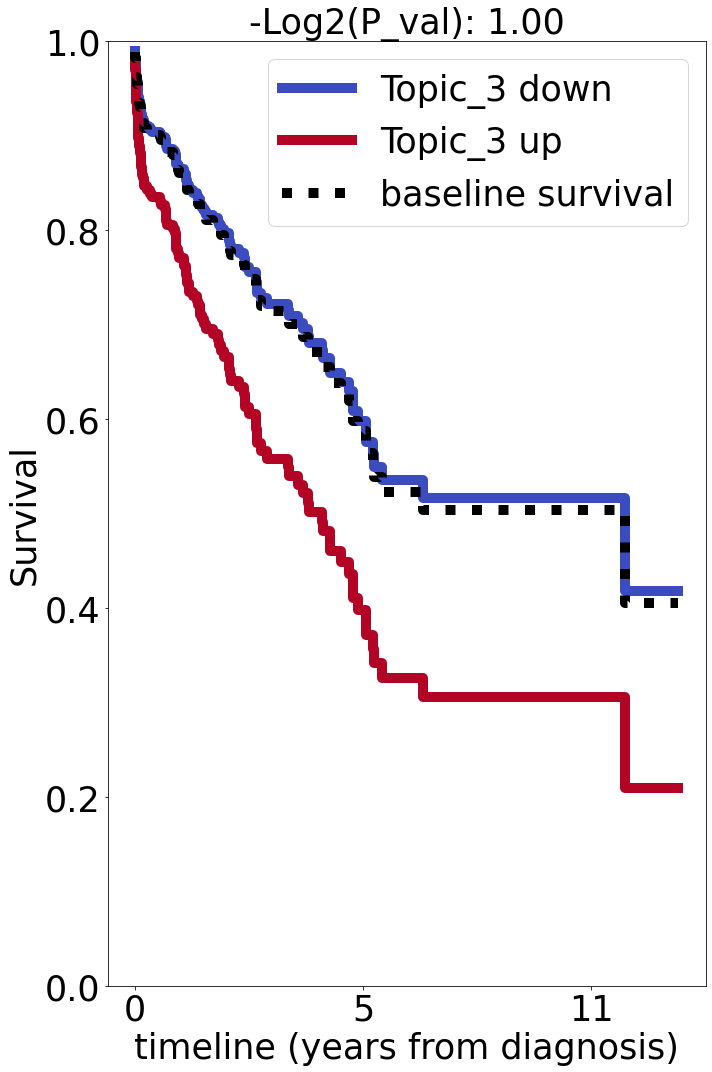

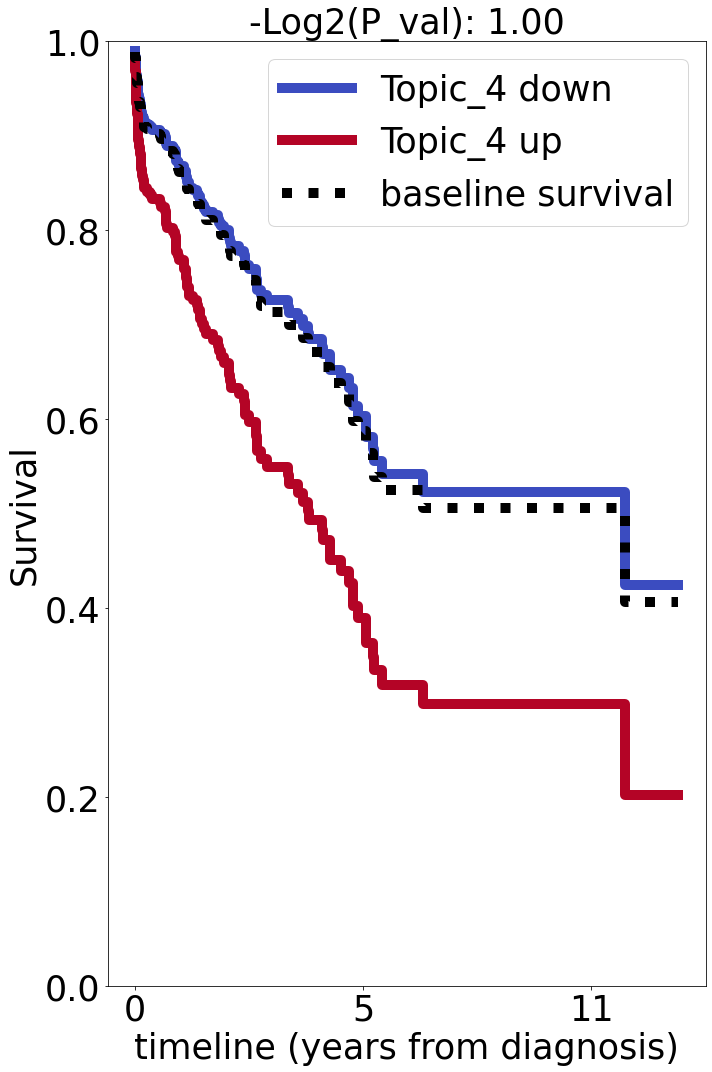

In [39]:
for dataset in ["TCGA-LUAD", "TCGA-LUSC"]:
    mask = (~df_files["days_survival"].isna()) & (df_files["cases.0.diagnoses.0.tumor_stage"]!="not reported") & (df_files["cases.0.project.project_id"]==dataset)
    subset = df_files[mask]
    subset = subset[["days_survival","vital_status","gender", "tumor_stage", "age_at_diagnosis"]]
    for topic in df_clusters.columns:
        top_set = add_group_to_subset(topic, subset, df_clusters, 0.5)
        print(top_set["group"].sum())
        summary, _, ax = fit_cox(top_set, topic)
        if summary is not None:
            if summary.at[summary.index[-1],"-log2(p)"] > 3:
                print(dataset,": ",topic,"\n",summary.loc[summary.index[-1],["coef", "p"]],"\n")
        if ax is not None:
            ax.set_title(dataset+" "+ax.title.get_text(), fontsize=35)
            save_plot(ax, dataset, topic)

Topic 1 528
Too low -log2(p): 0.7261998753022876
Topic 2 536
Too low -log2(p): -0.0
Topic 3 545
Too low -log2(p): 0.9095241269951095
Topic 4 532
Too low -log2(p): -0.0
Topic 5 551
Too low -log2(p): -0.0
Topic 6 531
Too low -log2(p): -0.0
Topic 7 518
Too low -log2(p): -0.0
Topic 8 536
Too low -log2(p): 0.9953159561568445
Topic 9 532
Too low -log2(p): -0.0
Topic 10 539
Too low -log2(p): -0.0
Topic 11 538
Too low -log2(p): -0.0
Topic 12 535
Topic 12 
 coef   -0.475081
p       0.093362
Name: Topic_12, dtype: float64 

Topic 13 540
Too low -log2(p): -0.0
Topic 14 552
Too low -log2(p): -0.0
Topic 15 542
Too low -log2(p): -0.0
Topic 16 542
Too low -log2(p): -0.0
Topic 17 399
Too low -log2(p): -0.0
Topic 18 526
Topic 18 
 coef    0.511682
p       0.069346
Name: Topic_18, dtype: float64 

Topic 19 537
Too low -log2(p): -0.0
Topic 20 521
Too low -log2(p): -0.0
Topic 21 537
Too low -log2(p): 0.3290447230887173
Topic 22 539
Too low -log2(p): -0.0
Topic 23 547
Topic 23 
 coef   -0.527596
p       0.

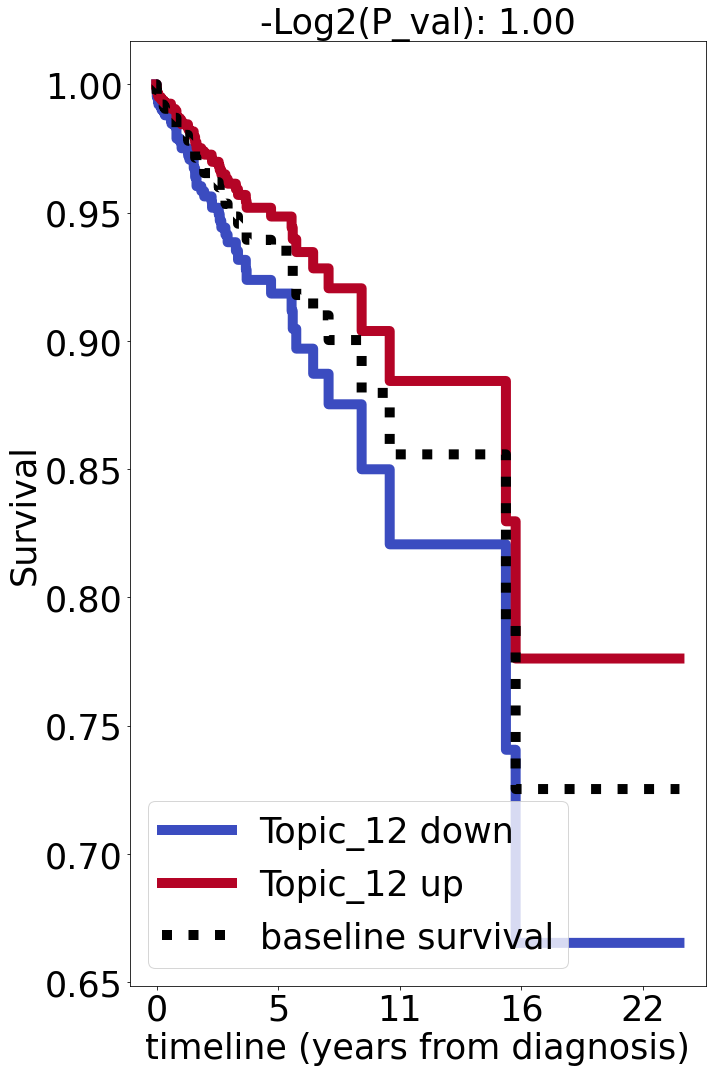

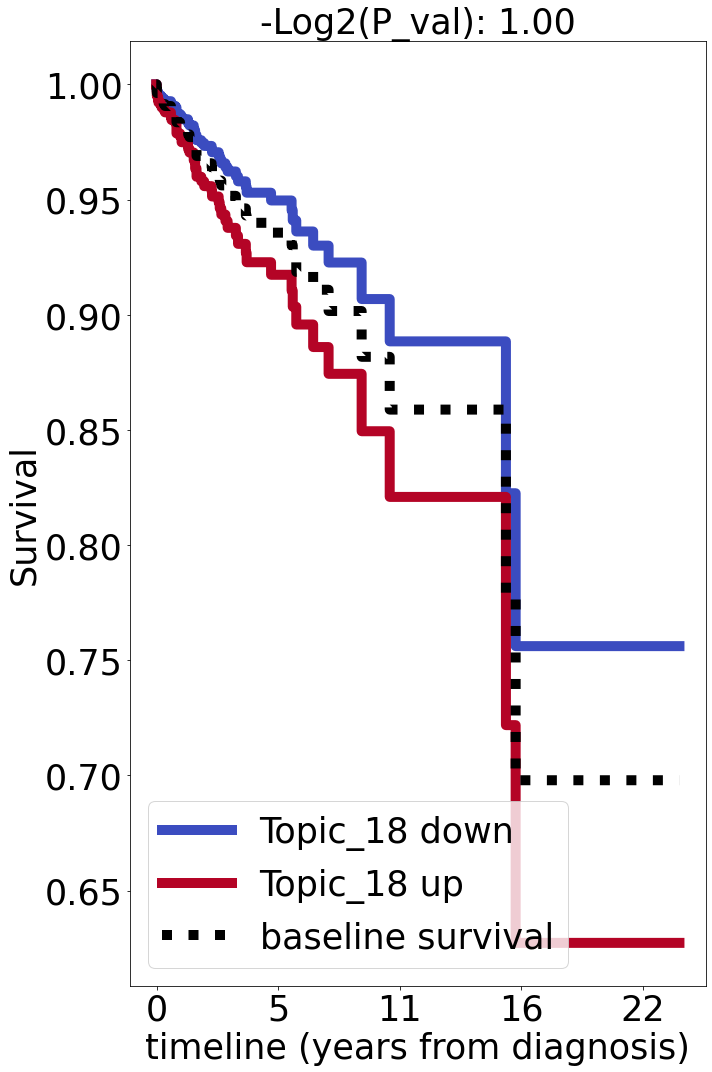

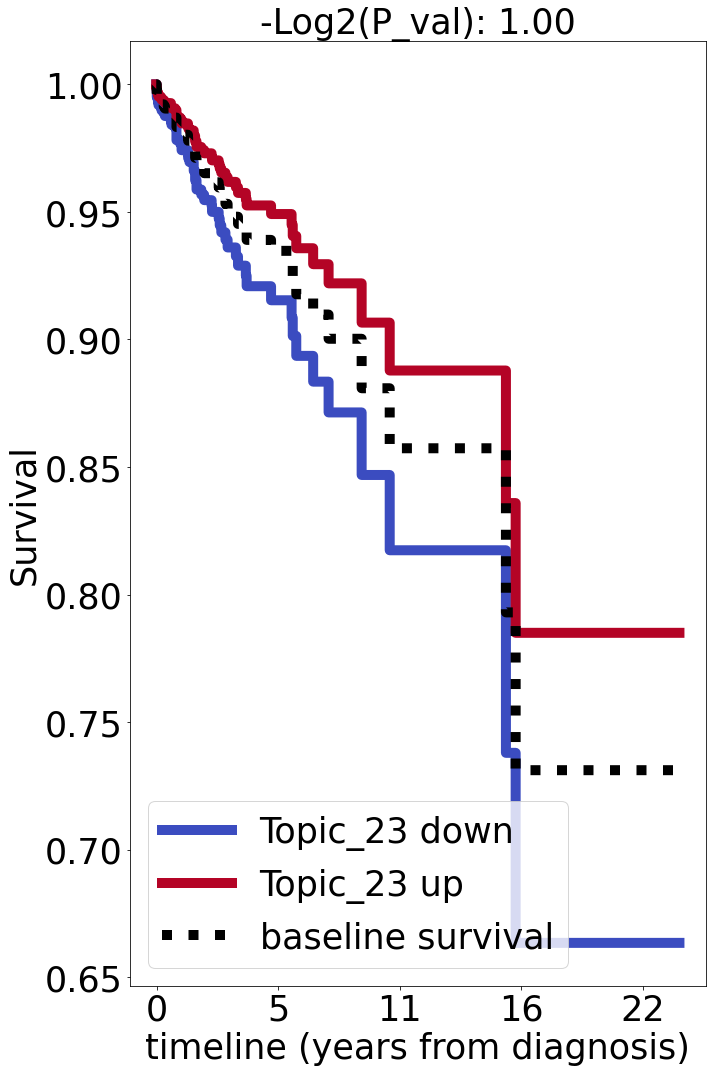

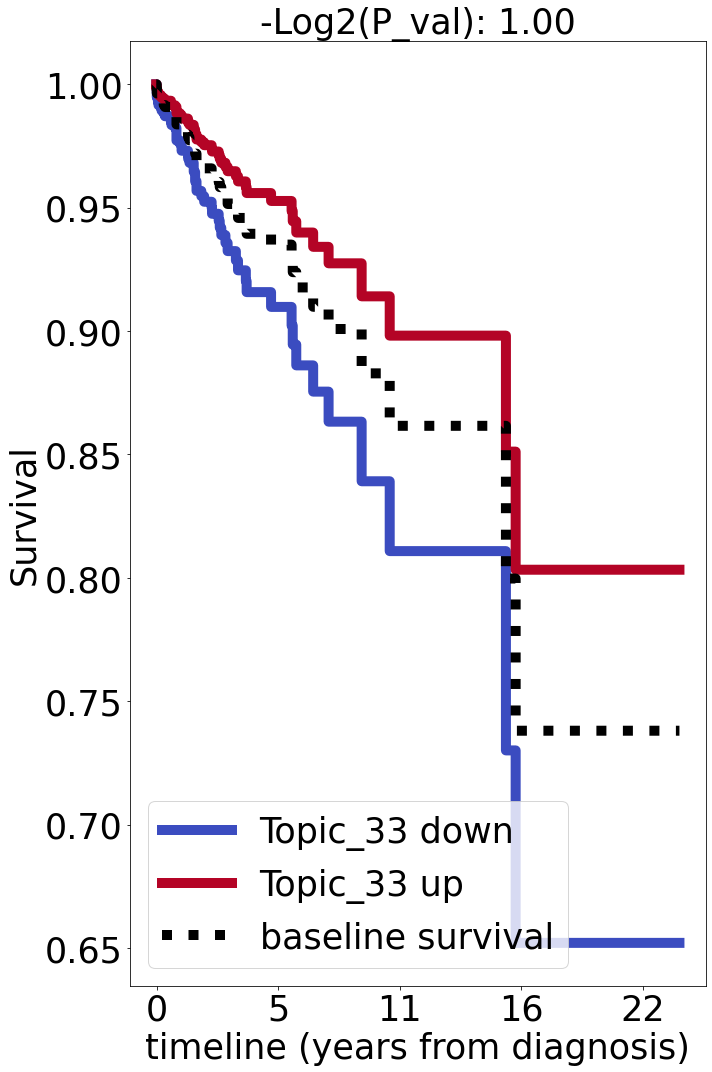

In [38]:
mask = (~df_files["days_survival"].isna()) & (df_files["cases.0.diagnoses.0.tumor_stage"]!="not reported")
subset = df_files[mask]
subset = subset[["days_survival","vital_status","gender", "tumor_stage", "age_at_diagnosis"]]
for topic in df_clusters.columns:
    top_set = add_group_to_subset(topic, subset, df_clusters, 0.5)
    print(topic, top_set["group"].sum())
    summary, _, ax = fit_cox(top_set, topic)
    if summary is not None:
        if summary.at[summary.index[-1],"-log2(p)"] > 3:
            print(topic,"\n",summary.loc[summary.index[-1],["coef", "p"]],"\n")
    if ax is not None:
        ax.set_title(ax.title.get_text(), fontsize=35)
        save_plot(ax, "all", topic)

In [ ]:
summary, _, ax = fit_cox(top_set, "Topic 3")
print(summary[["coef", "exp(coef)", "p", "-log2(p)", "corrected_p", "-log2(corrected_p)"]])
save_plot(ax, "all", "Topic 3")

In [ ]:
for g in pd.read_csv("datasets/cancers/lung/lda/lda_level_2_topics.csv",index_col=1)["Topic 18"].values:
    print(g[:15])

In [ ]:
(pd.read_csv("datasets/cancers/lung/topsbm/topsbm_level_1_topics.csv",index_col=1)=="ENSG00000121552").any()